# Benchmarking `nvjpeg` 📊

In [ ]:
%run benchmark_nvjpeg_LoLa.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [1]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    #'1920x1080': (1920, 1080),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
}

# Parameters to benchmark
QUALITIES = range(40, 96, 1)
SUBSAMPLINGS = ['4:2:0']

SUBSAMPLING_TO_PARAM = {
    '4:2:0': '420'
}

In [2]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results_nvjpeg+jpeggpu_LoLa.csv')
df.head()

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD,Frame
0,1280x720,40,4:2:0,100,0.000186,0.154830,0.000005,0.001400,0.000686,0.000001,57.032,26.942295,0.780142,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
1,1280x720,41,4:2:0,100,0.000156,0.109584,0.000006,0.001282,0.000683,0.000001,58.318,26.966330,0.782030,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
2,1280x720,42,4:2:0,100,0.000155,0.109307,0.000006,0.001328,0.000681,0.000001,59.093,26.977057,0.782947,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
3,1280x720,43,4:2:0,100,0.000157,0.112250,0.000005,0.001357,0.000692,0.000001,59.615,26.982485,0.783350,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1
4,1280x720,44,4:2:0,100,0.000157,0.108043,0.000006,0.001369,0.000679,0.000000,60.813,26.986349,0.784380,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...,1


In [4]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

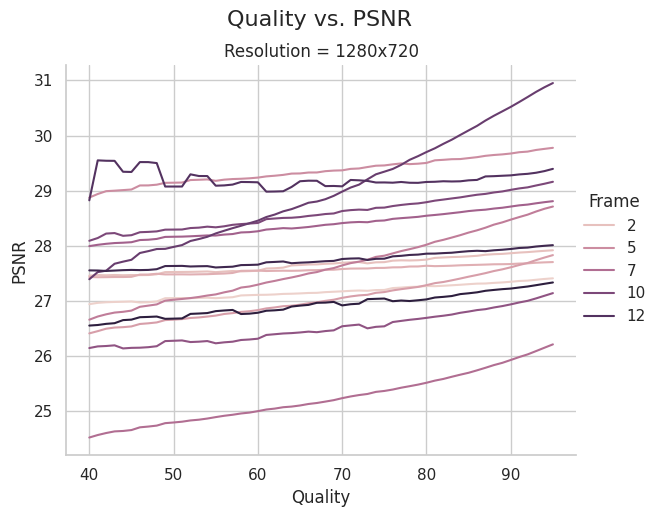

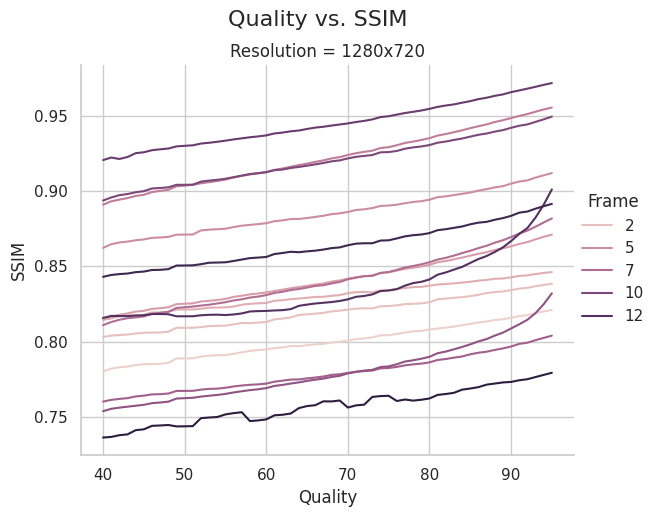

In [14]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


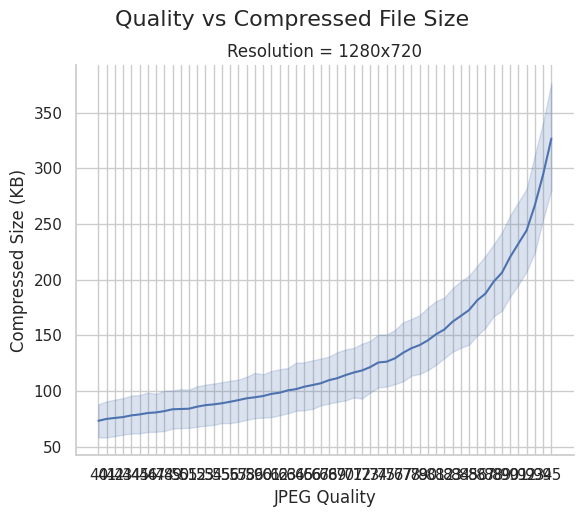

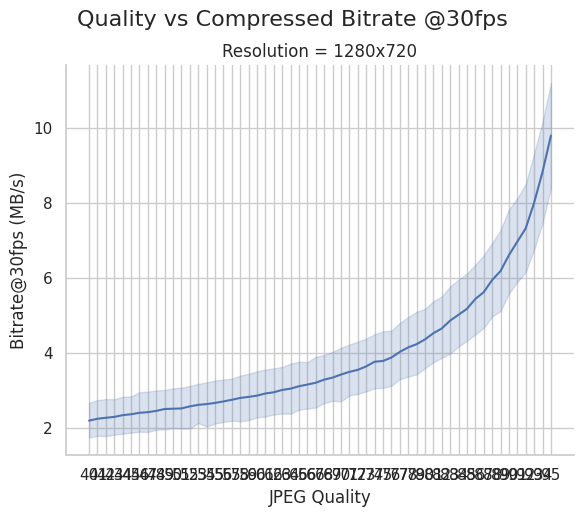

In [6]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
g.set(xticks=QUALITIES)
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    #hue='Frame',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
g.set(xticks=QUALITIES)
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

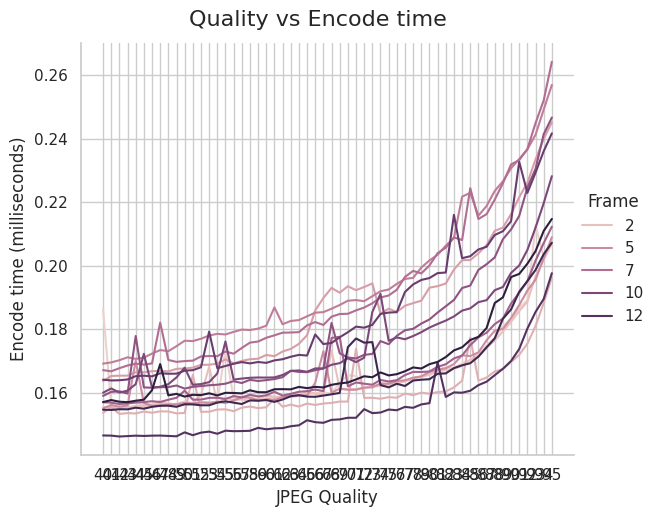

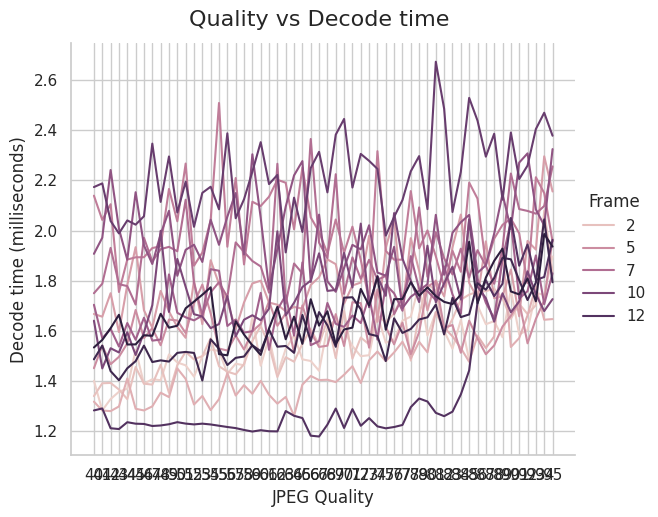

In [13]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
g.set(xticks=QUALITIES)
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    #hue='Frame',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
g.set(xticks=QUALITIES)
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
plt.show()

### Perform average avross frames

In [8]:
df_agg = df.groupby('Quality').agg({
    #'Quality': 'first',  # kept as-is (assuming same value across group)
    'Avg Encode Time (s)': 'mean',  # averaged
    'Avg Decode Time (s)': 'mean',
    'Compressed Size (KB)': 'mean',
    'PSNR': 'mean',
    'SSIM': 'mean',
}).reset_index()
df_agg

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
0,40,0.000161,0.001628,73.270500,27.205115,0.821396
1,41,0.000159,0.001611,74.961000,27.291164,0.822942
2,42,0.000159,0.001638,75.821429,27.313793,0.823765
3,43,0.000159,0.001570,76.606643,27.334008,0.824392
4,44,0.000162,0.001606,78.123214,27.322721,0.825474
5,45,0.000160,0.001642,78.959929,27.333340,0.826033
6,46,0.000160,0.001627,80.249929,27.383050,0.827237
7,47,0.000162,0.001634,80.789357,27.391453,0.827535
8,48,0.000160,0.001673,81.938286,27.405199,0.828005
9,49,0.000160,0.001701,83.612071,27.407284,0.829605


In [9]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 2 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
55,95,0.000224,0.001976,326.861643,28.313021,0.875337
54,94,0.000217,0.001961,294.565357,28.281243,0.872899
53,93,0.000212,0.001895,267.059786,28.248125,0.870603
52,92,0.000205,0.001853,244.374643,28.212870,0.868419
51,91,0.000202,0.001832,232.520500,28.187887,0.867138


In [10]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 1.5 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1.5]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
55,95,0.000224,0.001976,326.861643,28.313021,0.875337
54,94,0.000217,0.001961,294.565357,28.281243,0.872899
53,93,0.000212,0.001895,267.059786,28.248125,0.870603
52,92,0.000205,0.001853,244.374643,28.212870,0.868419
51,91,0.000202,0.001832,232.520500,28.187887,0.867138


In [11]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 1 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
48,88,0.000191,0.001793,198.373071,28.108777,0.862655
47,87,0.000187,0.001791,187.550143,28.081490,0.861265
44,84,0.000183,0.001760,167.472071,28.003378,0.857618
43,83,0.000182,0.001745,162.273143,27.978950,0.856475
42,82,0.000179,0.001738,155.272214,27.957829,0.855479


In [12]:
df_agg[df_agg['Avg Encode Time (s)'] * 1000 + df_agg['Avg Decode Time (s)'] * 1000 <= 0.5 * 2].sort_values(by='SSIM', ascending=False).head(5)
#df = df[df['Avg Encode Time (s)'] * 1000 <= 0.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 0.5]
#df.sort_values(by='SSIM', ascending=False).head(5)

,Quality,Avg Encode Time (s),Avg Decode Time (s),Compressed Size (KB),PSNR,SSIM
